# Feature Scaling

Scikit-learn provides the following scaling classes:

* **StandardScaler(X)**: Scales the data so that the mean is 0 and the standard deviation is 1.
* **MinMaxScaler(X)**: Scales the data so that the maximum value is 1 and the minimum value is 0.


### Standardization vs Normalization

In data preprocessing, **Standardization** and **Normalization** are two common techniques used to scale features. Here's the difference between them:

| **Technique**     | **Description**                                                                                             | **Formula**                                                    | **When to Use**                                       |
|-------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------|------------------------------------------------------|
| **Standardization** | Transforms the data to have a mean of 0 and a standard deviation of 1. This is useful when the data follows a Gaussian distribution. | \( \frac{x - \mu}{\sigma} \) (where \( \mu \) is the mean and \( \sigma \) is the standard deviation) | Use when the algorithm assumes the data is normally distributed (e.g., Linear Regression, SVM, Logistic Regression). |
| **Normalization**   | Scales the data to a fixed range, typically [0, 1]. It is useful when the data does not follow a Gaussian distribution. | \( \frac{x - \min(x)}{\max(x) - \min(x)} \) (scales data to the range [0, 1]) | Use when the data needs to be scaled to a specific range (e.g., Neural Networks, KNN). |

---

### Key Differences

- **Standardization**: Centers the data by subtracting the mean, then scales it by dividing by the standard deviation. It does not bound values to a specific range.
- **Normalization**: Rescales the data to fit within a specified range, such as [0, 1], which is helpful when features have different scales.

---

### Example Code

```python
import numpy as np

# Sample data
ex = np.array([0, 1, 2, 3, 4, 5])

# Standardization
standardized_data = (ex - ex.mean()) / ex.std()
print('Standardization:', standardized_data)

# Normalization
normalized_data = (ex - ex.min()) / (ex.max() - ex.min())
print('Normalization:', normalized_data)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands On!

In [10]:
import numpy as np

In [12]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('Standardization:', (ex - ex.mean()) / ex.std())
print('Normalization:', (ex - ex.min()) / (ex.max() - ex.min()))

Standardization: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalization: [0.  0.2 0.4 0.6 0.8 1. ]


# Scikit-learn StandardScaler

The usage of `StandardScaler` is as follows:

* (1) **`fit`**: Estimates the distribution of the training data. When the `fit` method is executed on the training data, it stores the distribution parameters (mean and standard deviation) inside the object.
* (2) **`transform`**: Transforms the training data. When the `transform` method is executed on the training data, it scales the data based on the parameters learned during `fit`.
* (3) **`fit_transform`**: Combines steps (1) and (2) into one method. The `fit_transform` method fits the model on the training data and then transforms the data in one step.

For preprocessing:
- Apply the **`fit_transform()`** method on the training data.
- Apply the **`transform()`** method on the test data.

**Important Note**:  
If the training and test data are scaled differently, the trained model may misinterpret the test data, leading to inaccurate performance evaluation. Therefore, both the training and test data should be preprocessed using the same scaling ratio.


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.array([0, 1, 2, 3, 4, 5])
X_test = np.array([0,10,20,30,40,50])
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.reshape(-1,1))
X_test_std = scaler.transform(X_test.reshape(-1,1))

print(X_train_std)
print(X_test_std)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]
[[-1.46385011]
 [ 4.39155033]
 [10.24695077]
 [16.1023512 ]
 [21.95775164]
 [27.81315208]]


# Effect of Scaling

Adjusting the scale of the data can improve the learning process, leading to better model accuracy compared to when scaling is not applied.


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)
print(X_train.shape)


(426, 30)


In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

사이킷런에서 제공하는 유방암 데이터셋에는 스케일이 매우 다른 특성변수가 있다.

In [6]:
X_train.reshape(-1,1)

array([[12.31   ],
       [16.52   ],
       [79.19   ],
       ...,
       [ 0.08278],
       [ 0.2829 ],
       [ 0.08832]])

['mean perimeter' 'mean area']


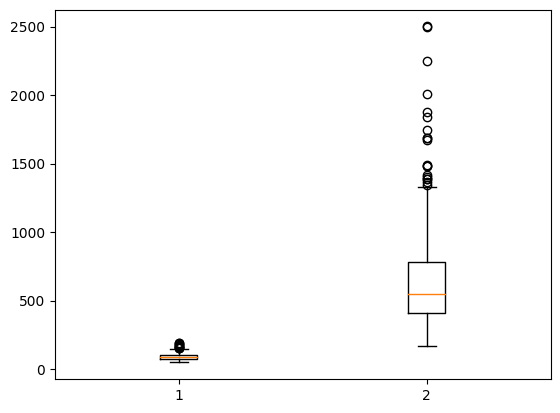

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print(cancer.feature_names[[2,3]])

plt.boxplot(X_train[:,2:4])
plt.show()

### 데이터 스케일 조정을 하지 않는 경우

In [8]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('test accuracy: %.3f'%(svc.score(X_test, y_test)))

test accuracy: 0.629


### 데이터 스케일을 조정한 경우

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

svc.fit(X_train_scale, y_train)

print('test accuracy: %.3f'%(svc.score(X_test_scale, y_test)))

test accuracy: 0.951


데이터의 스케일을 조정하여 모형의 성능이 개선되었다.